In [1]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from time import time
import matplotlib.pyplot as plt
import random
from random import randint

In [2]:
#1622
#User 564
#Reading users file:
u_cols = ['user_id','age','sex','occupation','zip_code']
users = pd.read_csv('ml-100k/u.user', sep='|', \
                    names=u_cols,encoding='latin-1')

#valid_users = [564, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 586, 588, 589, 590, 591, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 649, 651, 652, 653, 654, 656, 657, 658, 659, 660, 661, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 677, 678, 679, 680, 681, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 700, 701, 702, 703, 704, 705, 706, 708, 709, 710, 711, 712, 714, 715, 716, 717, 718, 719, 720, 721, 722, 723, 724, 725, 726, 728, 729, 730, 731, 732, 734, 735, 736, 737, 738, 739, 740, 741, 742, 743, 744, 745, 746, 748, 749, 750, 752, 753, 754, 755, 757, 758, 759, 760, 761, 763, 764, 765, 766, 767, 768, 769, 770, 771, 772, 773, 774, 775, 776, 777, 778, 779, 780, 781, 783, 784, 785, 786, 788, 789, 790, 791, 792, 793, 794, 795, 796, 797, 798, 799, 800, 801, 802, 803, 804, 806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819, 820, 821, 822, 823, 824, 825, 826, 827, 829, 830, 831, 832, 834, 836, 837, 838, 841, 842, 843, 844, 845, 846, 847, 848, 849, 850, 852, 853, 855, 856, 857, 858, 859, 860, 861, 862, 864, 865, 866, 867, 868, 869, 871, 872, 873, 874, 875, 876, 877, 878, 879, 881, 882, 884, 885, 886, 887, 888, 889, 890, 891, 892, 893, 895, 897, 898, 899, 900, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915, 917, 919, 920, 921, 922, 923, 924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935, 936, 937, 938, 939, 940, 941, 942, 943]
#Reading ratings file:
r_cols = ['user_id','movie_id','rating','unix_timestamp']
rating = pd.read_csv('ml-100k/u.data',sep='\t',names=r_cols,\
                     encoding='latin-1')

#Reading the movie file:
item_cols = ['movie_id','movie title','release date',
'video release date','IMDb URL','unknown','Action',
'Adventure','Animation','Childrens','Comedy','Crime',
'Documentary','Drama','Fantasy','Film-Noir','Horror',
'Musical','Mystery','Romance ','Sci-Fi','Thriller',
'War' ,'Western']

movies = pd.read_csv('ml-100k/u.item', sep='|',names=item_cols,\
                   encoding='latin-1')

movies.dropna()
movies_prof = movies[['movie_id','movie title','release date']].copy()
movies_prof1 = movies_prof.copy()
#print(movies_prof1.head())
movies_prof1['release date'] = pd.to_datetime(movies_prof1['release date'])
movies_prof1 = movies_prof1.sort_values(['release date'])
#print(movies_prof1)
profit = pd.DataFrame(columns=['movie_id','Profit'])
#print("Here")
#print(movies_prof1.head())
#early = int(str(movies_prof1['release date'].iloc[-1])[7:11])
last = "NaT"
j = -1
while(last == "NaT"):
    last = str(movies_prof1['release date'].values[j])
    j-=1
#print("Latest Year: ", last)
last = int(last[:4])

In [3]:
for j,i in zip(movies_prof1['movie_id'],movies_prof1['release date']):
    date = str(i)
    if(date == 'NaT'):
        sum = 0
    else:
        #Profit calculation
        year = int(date[:4])
        gamma = 0.5
        if(year == last ):
            sum = 1
        else:
            sum = (gamma)**(last-year)
        #print(sum)
        sum1 = pd.DataFrame([[j,sum]],columns=['movie_id','Profit'])
    profit = profit.append(sum1)
#print(profit)
movies_prof2 = pd.merge(profit,movies_prof1)
#print(movies_prof2.head())
#print(movies_prof2.tail())

In [4]:
#print(rating.head())
df2  = rating.copy()

df2.head()

groups = df2.groupby("user_id", as_index=False)
k = 0
columns = ['user_id','age','sex','movie_id']
#print(users)
df_users = pd.DataFrame(columns=columns)
#print(df_user)
for group in groups:
    toy_stor = group
    toy_story = toy_stor[1].copy()
    #print((toy_story) )
    movie_num = toy_story['movie_id'].iloc[0]
    users_rating = users.copy()
    df_1_toy = users.copy()
    #df_1_toy.occupation.unique()

    user_movie = pd.merge(df_1_toy,toy_story)
    #print("Sigh\n",user_movie)
    

    #user_movie = user_movie.drop(['unix_timestamp','rating','zip_code'],axis=1)
    #print(user_movie.head())
    user_movie = user_movie.loc[user_movie['rating'] >= 3]
    #print(user_movie.head())
    user_movie = user_movie.drop(['unix_timestamp','rating','zip_code','occupation'],axis=1)
    
    df_users = df_users.append(user_movie)
        
    k+=1

#print("right here")
df_users = df_users.reset_index(drop=True)
size = df_users.loc[df_users['user_id'] < 564].shape[0]
df_users = df_users[:size].copy()
df_users.sex.replace(['M', 'F'], [1, 0], inplace=True)
#print(df_users)

In [5]:
labels_train = df_users[['movie_id','user_id']].copy()
labels_train = labels_train.set_index('user_id')
#print(labels_train.head())
#print("\nlabels_train\n")
#print(labels_train.head())
#print("sort:")
labels_train = pd.Series(df_users['movie_id'].values,\
                         index=df_users['user_id'])
labels_train = labels_train.rename("movie_id")
labels_train= labels_train.\
apply(pd.to_numeric, errors='coerce')
labels_train = labels_train.sort_values()
#print(labels_train.head())
df_user = df_users.copy()
df_user = df_user.sort_values(by=['movie_id'])
df_user = df_user.drop(['movie_id'],axis=1)
#print(df_users.set_index('user_id'))
#df_users = df_users.set_index('user_id')
#print(df_user)
#print("here")
#print("Labels size",len(labels_train))
#print(labels_train.loc[labels_train['movie_id'] == 586].shape[0])
#print(df_user.head())
df_user = df_user.set_index('user_id')
#print(df_user.head())

In [6]:
movies1 = labels_train.unique()
movies1 = movies1.tolist()

In [7]:
GNB = MultinomialNB()
t0 = time()
#print(labels_train.head())
#print(labels_train.tail())
#print(df_user.head())
#print(df_user.tail())
GNB.fit(df_user,labels_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

# Predictions
This goes about predicting the movies that users should watch using the Multinomial Naive Bayes Model.

In [8]:
#for i in [563,566,567,568]:
#print(movies1[:10])
movies_sort = movies1.copy()
#print(movies_sort[:11])
movies_sort.sort()

#print(movies_sort[:11])
genre = ['video release date','IMDb URL','unknown','Action',\
            'Adventure','Animation','Childrens','Comedy','Crime',\
            'Documentary','Drama','Fantasy','Film-Noir','Horror',\
            'Musical','Mystery','Romance ','Sci-Fi','Thriller',\
            'War' ,'Western']
valid_users = [564, 566, 567, 568, 569, 570, 571, 572, 573, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 586, 588, 589, 590, 591, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 638, 639, 640, 641, 643, 645, 646, 647, 649, 651, 652, 653, 654, 656, 657, 658, 659, 660, 661, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 677, 678, 679, 680, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 693, 695, 696, 697, 698, 700, 701, 702, 703, 704, 706, 709, 710, 711, 712, 714, 715, 716, 717, 718, 719, 720, 721, 722, 723, 725, 726, 728, 729, 730, 731, 732, 734, 735, 736, 737, 738, 740, 741, 742, 743, 744, 745, 746, 748, 749, 750, 752, 753, 754, 755, 757, 759, 760, 763, 764, 765, 766, 767, 768, 769, 770, 771, 772, 773, 774, 775, 777, 778, 779, 780, 781, 783, 784, 785, 786, 788, 789, 790, 791, 792, 794, 795, 796, 797, 800, 801, 802, 803, 806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819, 820, 821, 822, 823, 824, 825, 826, 827, 829, 830, 831, 832, 834, 836, 837, 838, 841, 843, 844, 848, 849, 850, 852, 853, 855, 856, 857, 858, 859, 860, 861, 862, 865, 866, 872, 873, 874, 875, 876, 877, 878, 879, 881, 884, 885, 886, 888, 889, 890, 891, 892, 893, 895, 897, 898, 899, 900, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915, 917, 919, 920, 922, 923, 924, 926, 927, 928, 929, 930, 931, 933, 934, 935, 937, 938, 939, 940, 941, 942, 943]
#valid_users = [564,566,567,568,569]
print("Movies sorted",len(movies_sort))
year = []
prob = []
#print(tot_prob)
#print(tot_prof)
#for i in [563,566,567]:
#for i in range(563,943):
#for i in valid_users:
for iter1 in range(20):
    random_movie = movies_sort.copy()
    i = random.choice(valid_users)
    i-=1
    valid_users.remove(i+1)
    #print("yeah")
    df_sugg = pd.DataFrame(columns = ['user_id','age','sex'])
    df_user = users.iloc[i].copy()
    df_user = df_user.drop(['occupation','zip_code'], axis=0)
    #print(df_user)
    #print(type(df_user))
    #df_user = df_user.set_index('user_id')
    if(df_user['sex'] == 'M'):
        df_user['sex'] = 1
    else:
        df_user['sex'] = 0
    df_sugg = df_sugg.append(df_user)
    #print(df_sugg)
    df_sugg = df_sugg.set_index('user_id')
    nb_pred = GNB.predict(df_sugg)
    approx_pred = GNB.predict_proba(df_sugg)
    proba = approx_pred[0].copy()
    proba1 = proba.copy()
    #print(proba)
    #print(type(proba))
    if(i== 563):
        print(df_sugg)
    #list1 = [j for j in range(1,1484)]
    mov = pd.DataFrame(proba,columns=['Probability'])
    mov['movie_id'] = None
    for j in range(len(movies1)):
        mov.loc[j,'movie_id'] = movies1[j]
    mov = mov.sort_values(['Probability'],ascending=False)
    #print(mov)
    tot = mov['Probability'].sum()
    #print(mov)
    combine = pd.merge(mov,movies_prof2,how='outer')
    #combine = combine.drop('release date',axis=1)
    #print(combine)
    y=0
    if(i == 600 or i == 700 or i ==800 or i == 901):
        print(df_sugg)
    combine['R_y'] = combine['Profit'] * combine['Probability']
    if('Star Wars' not in combine['movie title'][0]):
        print(df_sugg)
        print(combine['movie title'][0])
    rand_mov = randint(0,len(movies_sort))
    for i_mov in range(20):
        rand_mov = random.choice(random_movie)
        random_movie.remove(rand_mov)
        prob.append(float(combine.loc[combine['movie_id'] == rand_mov]['Probability'].values))
        #year.append(str(combine.loc[combine['movie_id'] == rand_mov]['movie title']))
        str1 = ((combine.loc[combine['movie_id'] == rand_mov]['release date']).values)
        year.append(str(str1)[2:6])
        
    #print(df_sugg,"\n",combine['Probability'][rand_mov],combine['release date'][rand_mov])
    #print(combine[:15])
    #print("\n\n\n")
    m = 0

Movies sorted 1483


In [10]:
print(len(prob))
print(len(year))

400
400


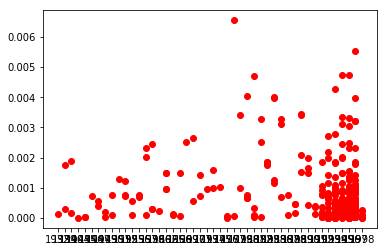

In [11]:
plt.plot(year,prob,'ro')
#ax.xaxis.set_minor_locator(plt.MultipleLocator(1960))
#plt.rcParams["figure.figsize"] = [20,25]
plt.show()

# User Ratings
This outputs the actual user ratings that people submitted

In [12]:
groups = df2.groupby("user_id", as_index=False)
#print(movies1)
k=1
user_num=0
index = user_num
print(len(movies1))
#valid_users = []
for group in groups:
    #print(group)
    #print(len(group))
    #if(k == 564 or k == 566 or k == 567):
    if(k == 564):
    #if(k > 563):
        #print("User_num: ",group[0])
        toy_stor = group
        #print(toy_stor)
        toy_story = toy_stor[1].copy()
        #print(toy_story['movie_id'].tolist())
        #print(movies1)
        if(set(toy_story['movie_id'].tolist()).issubset(movies1) == False):
            k+=1
            continue
        else:
            #print(movies1)
            valid_users.append(group[0])
            #print(movies1.sort())
            #print(toy_story)
            df_user1 = toy_story.copy()
            #print("here")
            #print(df_user1)
            movie_user1 = pd.merge(df_user1,movies)
            movie_user1 = movie_user1.drop(genre,axis=1)
            movie_user2 = movie_user1.copy()
            movie_user2 = movie_user2.sort_values("rating",ascending=False)
            movie_user2 = movie_user2.reset_index(drop=True)

            #print(len(movie_user2))
            #print(len(movie_user2.loc[movie_user1['rating'] >= 3]))
            print("*"*40,"Actual User Rating","*"*40)
            print("User_num:",group[0])
            print("\n")
            for i in range(len(movie_user2)):
                print(movie_user2['movie_id'][i],\
                      movie_user2['movie title'][i],\
                      movie_user2['rating'][i])
                j=0
    k+=1
    #if(k == 567):
    #    break
#print(valid_users)

1483
**************************************** Actual User Rating ****************************************
User_num: 564


181 Return of the Jedi (1983) 4
300 Air Force One (1997) 4
127 Godfather, The (1972) 4
118 Twister (1996) 4
117 Rock, The (1996) 4
245 Devil's Own, The (1997) 4
313 Titanic (1997) 4
292 Rosewood (1997) 4
50 Star Wars (1977) 4
289 Evita (1996) 4
597 Eraser (1996) 4
258 Contact (1997) 4
345 Deconstructing Harry (1997) 4
344 Apostle, The (1997) 4
257 Men in Black (1997) 4
472 Dragonheart (1996) 4
121 Independence Day (ID4) (1996) 4
827 Daylight (1996) 3
924 White Squall (1996) 3
302 L.A. Confidential (1997) 3
281 River Wild, The (1994) 3
685 Executive Decision (1996) 3
750 Amistad (1997) 3
272 Good Will Hunting (1997) 3
298 Face/Off (1997) 3
831 Escape from L.A. (1996) 3
1034 Quest, The (1996) 3
312 Midnight in the Garden of Good and Evil (1997) 3
930 Chain Reaction (1996) 3
333 Game, The (1997) 3
323 Dante's Peak (1997) 3
1025 Fire Down Below (1997) 2
1016 Con Air (19